In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import json
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree

In [2]:
# Load user input data
with open('user.json', 'r') as f:
    user_data = json.load(f)

# Create label encoders
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()


In [3]:

data = user_data["data"]
result = user_data["result"]
dataframe = pd.DataFrame(data, columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
resultframe = pd.DataFrame(result, columns=["favorite"])

print(dataframe)

# Generate numerical labels
dataframe["Name"] = le1.fit_transform(dataframe["Name"])
dataframe["Type 1"] = le2.fit_transform(dataframe["Type 1"])
dataframe["Type 2"] = le3.fit_transform(dataframe["Type 2"])
dataframe["Generation"] = le4.fit_transform(dataframe["Generation"])
dataframe["legendary"] = le5.fit_transform(dataframe["legendary"])
dataframe["color"] = le6.fit_transform(dataframe["color"])
dataframe["first_letter"] = le7.fit_transform(dataframe["first_letter"])
resultframe["favorite"] = le8.fit_transform(resultframe["favorite"])

# Split data into training and testing sets
train_data = dataframe.sample(frac=0.8, random_state=0)
test_data = dataframe.drop(train_data.index)

# Split labels into training and testing sets
train_labels = resultframe.sample(frac=0.8, random_state=0)
test_labels = resultframe.drop(train_labels.index)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
model.fit(train_data, train_labels)

# display the dataframes
print(dataframe)


                          Name    Type 1    Type 2  Generation  legendary  \
0    AerodactylMega Aerodactyl      Rock    Flying           1        NaN   
1                       Crobat    Poison    Flying           2        NaN   
2        AmpharosMega Ampharos  Electric    Dragon           2        NaN   
3                      Breloom     Grass  Fighting           3        NaN   
4          MewtwoMega Mewtwo Y   Psychic      None           1        NaN   
..                         ...       ...       ...         ...        ...   
581      BeedrillMega Beedrill       Bug    Poison           1        NaN   
582                   Spinarak       Bug    Poison           2        NaN   
583                    Ariados       Bug    Poison           2        NaN   
584                     Dustox       Bug    Poison           3        NaN   
585      AmpharosMega Ampharos  Electric    Dragon           2        NaN   

                color first_letter  
0        Yellow (RYB)            A  
1

C:\Users\Tototime\AppData\Local\Temp\ipykernel_103936\1530478100.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_data, train_labels)


[Text(0.4095346373385609, 0.9736842105263158, 'x[0] <= 19.0\ngini = 0.5\nsamples = 298\nvalue = [233, 236]'),
 Text(0.06273062730627306, 0.9210526315789473, 'x[0] <= 6.5\ngini = 0.391\nsamples = 28\nvalue = [12, 33]'),
 Text(0.03690036900369004, 0.868421052631579, 'x[3] <= 1.5\ngini = 0.495\nsamples = 14\nvalue = [9, 11]'),
 Text(0.02952029520295203, 0.8157894736842105, 'x[3] <= 0.5\ngini = 0.498\nsamples = 12\nvalue = [9, 8]'),
 Text(0.014760147601476014, 0.7631578947368421, 'x[0] <= 2.5\ngini = 0.444\nsamples = 5\nvalue = [2, 4]'),
 Text(0.007380073800738007, 0.7105263157894737, 'gini = 0.5\nsamples = 3\nvalue = [2, 2]'),
 Text(0.02214022140221402, 0.7105263157894737, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.04428044280442804, 0.7631578947368421, 'x[0] <= 5.0\ngini = 0.463\nsamples = 7\nvalue = [7, 4]'),
 Text(0.03690036900369004, 0.7105263157894737, 'x[2] <= 8.0\ngini = 0.32\nsamples = 4\nvalue = [4, 1]'),
 Text(0.02952029520295203, 0.6578947368421053, 'gini = 0.375\nsamp

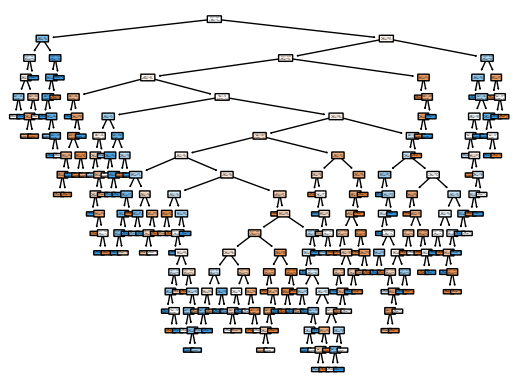

In [4]:
# Visualize the Forest
plot_tree(model.estimators_[0], filled=True, rounded=True)

In [6]:
# Test du modèle

data={"Name":"Pikachu","Type 1":"Electric","Type 2":"None","Generation":1,"legendary":False,"color":"Yellow (RYB)","first_letter":"P"}

data2={"Name":"Bulbasaur","Type 1":"Grass","Type 2":"Poison","Generation":1,"legendary":False,"color":"Green","first_letter":"B"}

#pokemon legendaire
data3={"Name":"Mewtwo","Type 1":"Psychic","Type 2":"None","Generation":1,"legendary":True,"color":"Purple","first_letter":"M"}

# Créer un dataframe pour le nouveau Pokémon
pokemon = pd.DataFrame([data], columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
pokemon2 = pd.DataFrame([data2], columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
pokemon3 = pd.DataFrame([data3], columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])

# Encoder les données
pokemon["Name"] = le1.fit_transform(pokemon["Name"])
pokemon["Type 1"] = le2.fit_transform(pokemon["Type 1"])
pokemon["Type 2"] = le3.fit_transform(pokemon["Type 2"])
pokemon["Generation"] = le4.fit_transform(pokemon["Generation"])
pokemon["legendary"] = le5.fit_transform(pokemon["legendary"])
pokemon["color"] = le6.fit_transform(pokemon["color"])
pokemon["first_letter"] = le7.fit_transform(pokemon["first_letter"])

pokemon2["Name"] = le1.fit_transform(pokemon2["Name"])
pokemon2["Type 1"] = le2.fit_transform(pokemon2["Type 1"])
pokemon2["Type 2"] = le3.fit_transform(pokemon2["Type 2"])
pokemon2["Generation"] = le4.fit_transform(pokemon2["Generation"])
pokemon2["legendary"] = le5.fit_transform(pokemon2["legendary"])
pokemon2["color"] = le6.fit_transform(pokemon2["color"])
pokemon2["first_letter"] = le7.fit_transform(pokemon2["first_letter"])

pokemon3["Name"] = le1.fit_transform(pokemon3["Name"])
pokemon3["Type 1"] = le2.fit_transform(pokemon3["Type 1"])
pokemon3["Type 2"] = le3.fit_transform(pokemon3["Type 2"])
pokemon3["Generation"] = le4.fit_transform(pokemon3["Generation"])
pokemon3["legendary"] = le5.fit_transform(pokemon3["legendary"])
pokemon3["color"] = le6.fit_transform(pokemon3["color"])
pokemon3["first_letter"] = le7.fit_transform(pokemon3["first_letter"])


# Prédire si le Pokémon est un favori
prediction = model.predict(pokemon)
prediction2 = model.predict(pokemon2)
prediction3 = model.predict(pokemon3)

# Afficher la prédiction
print("Prediction pour Pikachu: ", prediction)
print("Prediction pour Bulbasaur: ", prediction2)
print("Prediction pour Mewtwo: ", prediction3)

Prediction pour Pikachu:  [1]
Prediction pour Bulbasaur:  [1]
Prediction pour Mewtwo:  [1]
